# Two-agent velocity obstacle

In [2]:
import sys
sys.path.append('../../')
import numpy as np
import cvxpy as cp
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
from panav.env import NavigationEnv, Box2DRegion, PolygonRegion, box_2d_center, line_seg_to_obstacle
from panav.viz import draw_env
from panav.ORCA import VO
%load_ext autoreload
%autoreload 2

## Demo: the velocity obstacle of agent 0 induced by agent 1

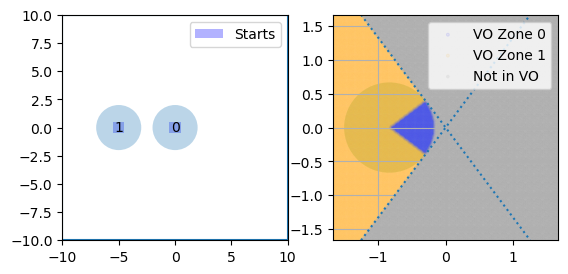

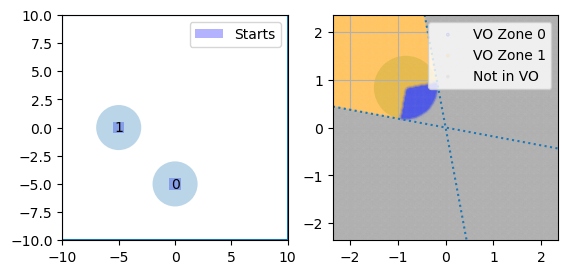

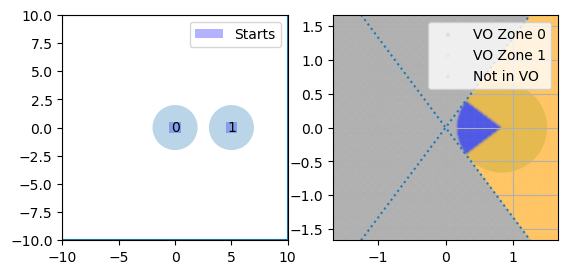

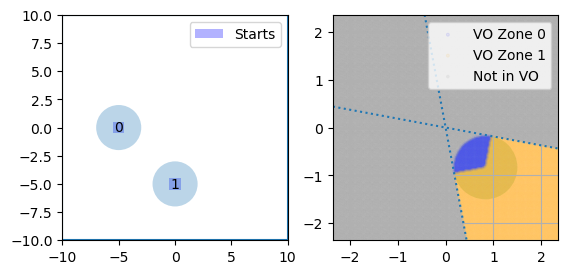

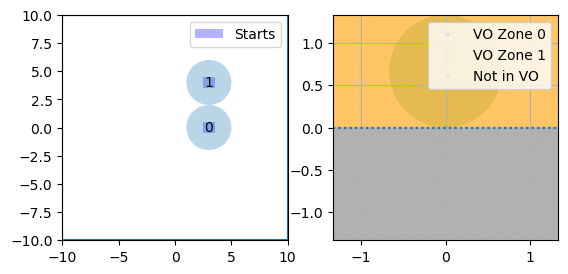

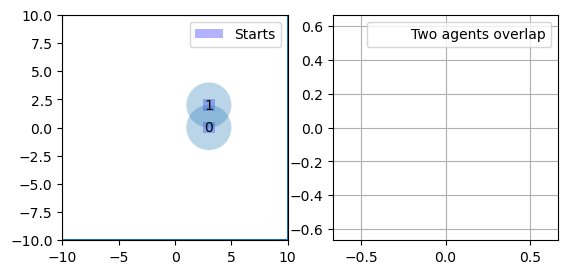

In [5]:

limits = [(-10.0,10.0),(-10.0,10.0)]
vmax = 1.0
bloating_r = 2.0
tau = 6


candidate_start = [ np.array([[-0,0],[-5,0]]),
                    np.array([[0,-5],[-5,0]]),
                    np.array([[0,0],[5,0]]),
                    np.array([[-5,0],[0,-5]]),
                    np.array([[3,0],[3,4]]),
                    
                    np.array([[3,0],[3,2]])
                    ]


for start_locs in candidate_start:

    start_box_side = np.array([1,1])
    goal_box_side = np.array([1,1])

    starts = [box_2d_center(s,start_box_side) for s in start_locs]
    
    fig,axes = plt.subplots(1,2)
    
    # Plot environment
    env = NavigationEnv(limits,[],starts,[])

    draw_env(env,[],axes[0])
    
    for i in range(len(start_locs)):
        circ = Circle(start_locs[i], bloating_r,alpha = 0.3)
        axes[0].add_artist(circ)
    
    
    # Compute the velocity obstacle of agent 0 induced by agent 1
    pa, pb = start_locs[0], start_locs[1]

    ra = rb = bloating_r
    
    vo = VO(pa,pb,ra,rb,tau)

    # Visualize the velocity obstacle
    ax = axes[1]
    
    vo.visualize(ax)
    